In [ ]:
import pickle 
import pandas as pd
from sklearn import model_selection, naive_bayes, svm, ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_path = '/content/drive/MyDrive/data/TFIDFEmebeddingsBalanced/tfidf_embeddings'
labels_path = '/content/drive/MyDrive/data/TFIDFEmebeddingsBalanced/labels.p'
data = pickle.load(open(data_path, "rb"))
labels = pickle.load(open(labels_path, "rb"))
train_x = data['tfidf_train_corpus']
val_x = data['tfidf_val_corpus']
train_y = labels['train_labels']
val_y = labels['val_labels']

train_x = (209991, 99625)

val_x = (89995, 99625)

train_y = 209991

val_y = 89995

In [ ]:
print(train_x.shape)
print(val_x.shape)
print(len(train_y))
print(len(val_y))


(209991, 99625)
(89995, 99625)
209991
89995


In [ ]:
directory_path = '/content/drive/MyDrive/models/balanced_dataset'

              precision    recall  f1-score   support

           0       0.53      0.69      0.60     29995
           1       0.46      0.40      0.43     30000
           2       0.42      0.34      0.38     30000

    accuracy                           0.48     89995
   macro avg       0.47      0.48      0.47     89995
weighted avg       0.47      0.48      0.47     89995



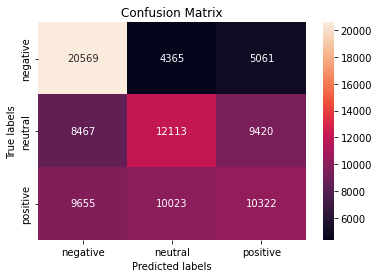

In [ ]:
#svm execution time: 5h
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_x,train_y)
pickle.dump(SVM, open(directory_path+'/svm_tfidf.p', 'wb'))

predictions_SVM = SVM.predict(val_x)

classification_reportSVM = classification_report(val_y, predictions_SVM)
print(classification_reportSVM)
confusion_matrixSVM = confusion_matrix(val_y, predictions_SVM)
#print(confusion_matrixSVM)

ax = plt.subplot()
sns.heatmap(confusion_matrixSVM, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

              precision    recall  f1-score   support

           0       0.51      0.70      0.59     29995
           1       0.46      0.40      0.43     30000
           2       0.41      0.31      0.36     30000

    accuracy                           0.47     89995
   macro avg       0.46      0.47      0.46     89995
weighted avg       0.46      0.47      0.46     89995



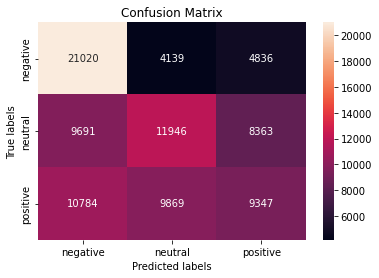

In [ ]:

bayes = naive_bayes.MultinomialNB()
bayes.fit(train_x,train_y)
pickle.dump(bayes, open(directory_path+'/bayes_tfidf.p', 'wb'))

predictions_NB = bayes.predict(val_x)

classification_reportNB = classification_report(val_y, predictions_NB)
print(classification_reportNB)
confusion_matrixNB = confusion_matrix(val_y, predictions_NB)
#print(confusion_matrixNB)

ax = plt.subplot()
sns.heatmap(confusion_matrixNB, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

In [ ]:

random_forest = ensemble.RandomForestClassifier()
random_forest.fit(train_x,train_y)
pickle.dump(random_forest, open(directory_path+'/random_forest_tfidf.p', 'wb'))

predictions_RF = random_forest.predict(val_x)

classification_reportRF = classification_report(val_y, predictions_RF)
print(classification_reportRF)
confusion_matrixRF = confusion_matrix(val_y, predictions_RF)
#print(confusion_matrixRF)

sns.heatmap(confusion_matrixRF, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

              precision    recall  f1-score   support

           0       0.54      0.69      0.61     29995
           1       0.46      0.45      0.46     30000
           2       0.43      0.31      0.36     30000

    accuracy                           0.49     89995
   macro avg       0.48      0.49      0.48     89995
weighted avg       0.48      0.49      0.48     89995

